In [44]:
# UNAD
## Peter Enrique Mojica Medina
## Regresión Logística - Dataset – Titanic dataset

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [128]:
## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [130]:
Datos = pd.read_csv('Titanic-Dataset.csv')

In [132]:
Datos.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [134]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

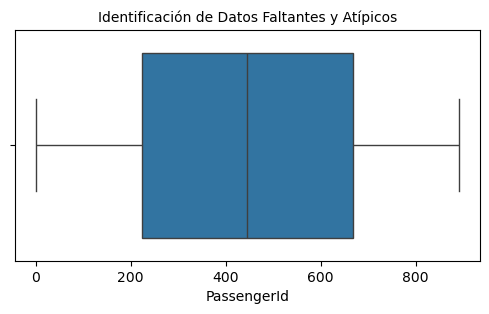

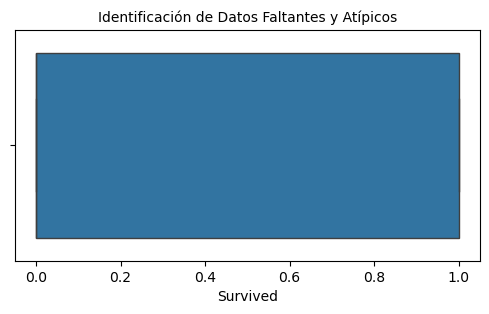

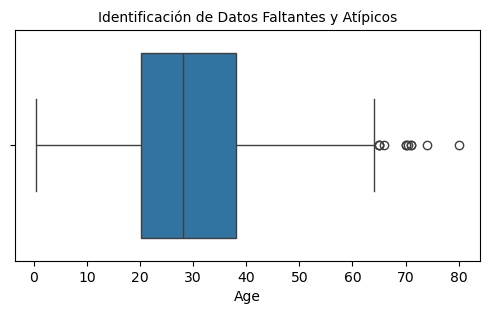

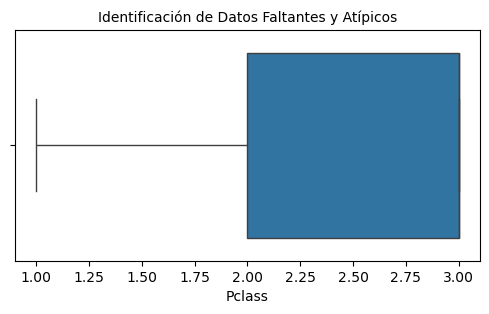

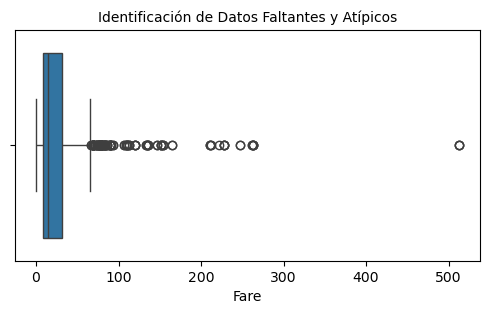

In [136]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['PassengerId'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Survived'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [138]:
## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
# Identificar columnas con datos faltantes
print(Datos.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [140]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en PassengerId: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en Survived:  549
Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Fare:  15


In [142]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['PassengerId']=Datos['PassengerId'].replace(0,Datos['PassengerId'].mean())
Datos['Survived']=Datos['Survived'].replace(0,Datos['Survived'].mean())
Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Pclass']=Datos['Pclass'].replace(0,Datos['Pclass'].mean())
Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())

In [144]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en PassengerId: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en Survived:  0
Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Fare:  0


In [146]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=1000
Total_Atipicos=((Datos['PassengerId']<nivel_minimo)|(Datos['PassengerId']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

nivel_minimo=0
nivel_maximo=1
Total_Atipicos=((Datos['Survived']<nivel_minimo)|(Datos['Survived']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

nivel_minimo=1
nivel_maximo=3
Total_Atipicos=((Datos['Pclass']<nivel_minimo)|(Datos['Pclass']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

nivel_minimo=0
nivel_maximo=100000
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0
El total de datos atípicos es 0
El total de datos atípicos es 0
El total de datos atípicos es 0
El total de datos atípicos es 0


In [216]:
# Seleccionar solo las columnas relevantes
Datos = Datos[['PassengerId', 'Survived', 'Age', 'Pclass', 'Fare']]

# Eliminar filas con valores nulos en cualquiera de las columnas seleccionadas
Datos.dropna(subset=['PassengerId', 'Survived', 'Age', 'Pclass', 'Fare'], inplace=True)

# Verificar si los valores nulos han sido eliminados
print(Datos.isnull().sum())

# Mostrar las primeras filas después de eliminar los valores nulos
print(Datos.head())

PassengerId    0
Survived       0
Age            0
Pclass         0
Fare           0
dtype: int64
   PassengerId  Survived   Age  Pclass     Fare
0            1  0.383838  22.0       3   7.2500
1            2  1.000000  38.0       1  71.2833
2            3  1.000000  26.0       3   7.9250
3            4  1.000000  35.0       1  53.1000
4            5  0.383838  35.0       3   8.0500


In [218]:
## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características: Survived, Pclass, Age.

In [220]:
# Filtrar columnas del modelo 

Datos1 = Datos[["Survived","Pclass","Age"]]
Datos1.head(20)

,Survived,Pclass,Age
0,0.383838,3,22.0
1,1.000000,1,38.0
2,1.000000,3,26.0
3,1.000000,1,35.0
4,0.383838,3,35.0
6,0.383838,1,54.0
7,0.383838,3,2.0
8,1.000000,3,27.0
9,1.000000,2,14.0
10,1.000000,3,4.0


Intercepto (β0): 0.9247025160145457
Coeficiente (year, β1): [-0.12992494]


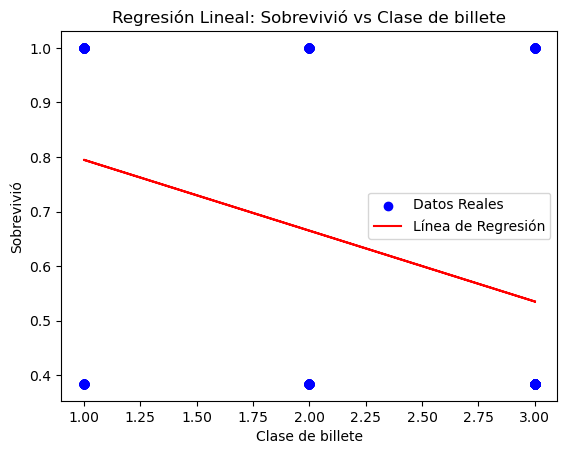

In [222]:
# Regresion lineal simple
# Convertir los datos en un DataFrame
df = pd.DataFrame(Datos)
# Variables independientes (Pclass) y dependiente (Survived)
X = df[['Pclass']]
y = df['Survived']
# Crear un modelo de regresión lineal
modelo = LinearRegression()
# Ajustar el modelo a los datos
modelo.fit(X, y)
# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (año, km_driven)
# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (year, β1): {beta_1}")
# Visualizar la regresión (opcional para datos simples)
plt.scatter(df['Pclass'], y, color='blue', label='Datos Reales')
plt.plot(df['Pclass'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Sobrevivió vs Clase de billete')
plt.xlabel('Clase de billete')
plt.ylabel('Sobrevivió')
plt.legend()
plt.show()


Intercepto (β0): 0.8630013454280037
Coeficiente (Fare, β1): -0.11085894633639902
Coeficiente (Pclass, β2): 0.0005443085705784844


C:\Users\pemoj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


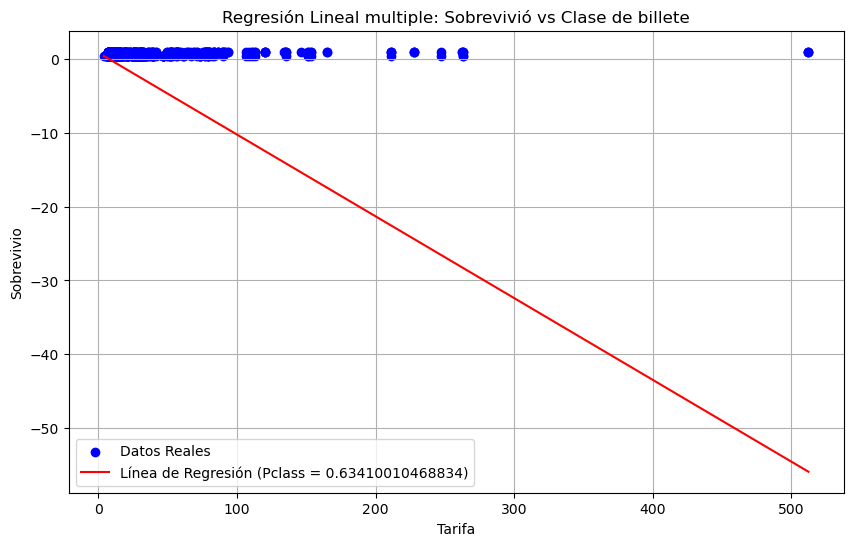

In [224]:
# Convertir los datos en un DataFrame 
df = pd.DataFrame(Datos)

# Variables independientes (Pclass,Fare) y dependiente (Survived)
X = df[['Pclass', 'Fare']]
y = df['Survived']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes (Pclass y Survived)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Fare, β1): {beta_1}")
print(f"Coeficiente (Pclass, β2): {beta_2}")

# Visualización de la regresión (manteniendo constante Pclass)
Pclass_fijo = df['Survived'].mean()  # Fijar el Survived en la media para el gráfico
Fare_range = np.linspace(df['Fare'].min(), df['Fare'].max(), 100)

# Predecir manteniendo Pclass constantes
predicciones_fijas = modelo.predict(np.column_stack((year_range, np.full_like(Fare_range, Pclass_fijo))))

# Graficar los datos reales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df['Fare'], y, color='blue', label='Datos Reales')
plt.plot(year_range, predicciones_fijas, color='red', label=f'Línea de Regresión (Pclass = {Pclass_fijo})')
plt.title('Regresión Lineal multiple: Sobrevivió vs Clase de billete')
plt.xlabel('Tarifa')
plt.ylabel('Sobrevivio')
plt.legend()
plt.grid()
plt.show()

In [226]:
## Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [228]:
#Ajustar columnas tipo object para poder procesarlos en el modelo

data_numerica = Datos.copy()
for column in data_numerica.columns:
    if data_numerica[column].dtype == 'object':
        label_encoder = LabelEncoder()
        data_numerica[column] = label_encoder.fit_transform(data_numerica[column])

In [230]:
# Total de vehiculos vendidos

Datos['Survived'].value_counts()

Survived
0.383838    424
1.000000    290
Name: count, dtype: int64

In [232]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = data_numerica.drop('Pclass', axis=1)
Y = data_numerica['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [234]:
#Validar datos en train
X_train.head(2)

,PassengerId,Survived,Age,Fare
535,536,1.000000,7.0,26.250
129,130,0.383838,45.0,6.975


In [236]:
#Validar datos en test
X_test.head(2)

,PassengerId,Survived,Age,Fare
423,424,0.383838,28.0,14.4000
177,178,0.383838,50.0,28.7125


In [238]:
##Entrenar el modelo configurando los diferentes hiperparámetros.

In [240]:
# Crear y entrenar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

In [242]:
# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test)

In [244]:
print (Prediccion)

[0.38383838 0.38383838 1.         0.38383838 1.         0.38383838
 0.38383838 0.38383838 0.38383838 0.38383838 0.38383838 1.
 1.         0.38383838 0.38383838 1.         0.38383838 1.
 1.         0.38383838 0.38383838 1.         1.         0.38383838
 0.38383838 1.         1.         0.38383838 1.         0.38383838
 0.38383838 0.38383838 0.38383838 1.         0.38383838 0.38383838
 1.         1.         0.38383838 1.         0.38383838 1.
 1.         0.38383838 0.38383838 1.         1.         0.38383838
 0.38383838 0.38383838 0.38383838 1.         0.38383838 1.
 0.38383838 0.38383838 1.         0.38383838 1.         0.38383838
 0.38383838 0.38383838 0.38383838 0.38383838 1.         0.38383838
 1.         0.38383838 0.38383838 1.         0.38383838 1.
 1.         1.         1.         1.         1.         0.38383838
 0.38383838 0.38383838 1.         1.         0.38383838 1.
 1.         0.38383838 0.38383838 0.38383838 1.         0.38383838
 1.         0.38383838 1.         0.3838383

In [246]:
## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
print('Coeficientes:', modelo_regresion.coef_)
print('Error cuadrático medio:', mean_squared_error(Y_test, Prediccion))
print('Coeficiente de determinación (R^2):', r2_score(Y_test, Prediccion))

Coeficientes: [ 5.78870927e-19  1.00000000e+00 -4.21316810e-16 -2.59807187e-17]
Error cuadrático medio: 4.5297028756190916e-29
Coeficiente de determinación (R^2): 1.0


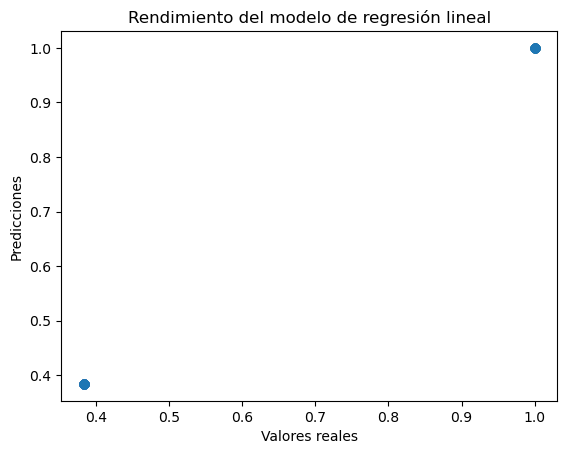

In [248]:
## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
# Visualizar el rendimiento del modelo
plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo de regresión lineal")
plt.show()

Coeficientes: [ 5.78870927e-19  1.00000000e+00 -4.21316810e-16 -2.59807187e-17]
R² (Coeficiente de determinación): 0.19103534638372532
Error Absoluto Medio (MAE): 0.2494934006371511
Error Cuadrático Medio (MSE): 0.07317353424790679
Raíz del Error Cuadrático Medio (RMSE): 0.2705060706304145


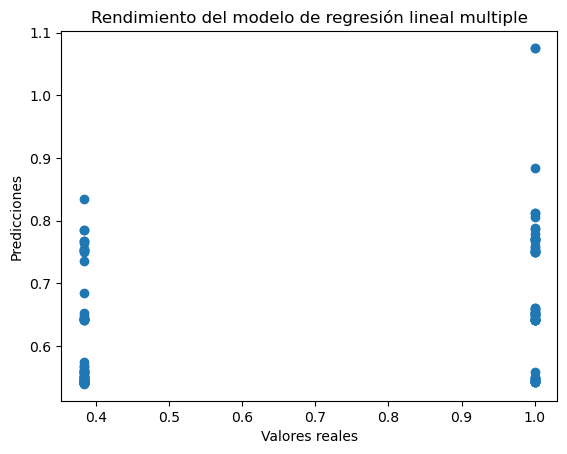

In [252]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.DataFrame(Datos)

# Variables independientes (year y km_driven) y dependiente (selling_price)
X = df[['Pclass', 'Fare']]
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Prediccion = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(Y_test, Prediccion)
mae = mean_absolute_error(Y_test, Prediccion)
mse = mean_squared_error(Y_test, Prediccion)
rmse = np.sqrt(mse)

# Evaluar el modelo
print('Coeficientes:', modelo_regresion.coef_)
# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

# Visualizar el rendimiento del modelo
plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo de regresión lineal multiple")
plt.show()